# Demonstrates how to input 2D field climatologies for many simulations

This script reads in climatologies that were computed and previously saved using ADF (years 10 to 24 of the Fixed SST runs). These are slightly different years than we used in earlier to turn in HW 2, not for any good reason

First do this for a few variables from the FixedSST runs and then later for FullyCoupled.
This is all just FYI and your job is to examine the data and decide how you want to analyze it. See homework assignment for some suggestions.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as colors

import numpy as np
import xarray as xr

In [ ]:
# Fixed SST 
ddir = '/glade/derecho/scratch/bitz/ADF/climo/FixedSST/'  # this is where the climatologies are

# these are the casenames used
casenames = ["AMIPpiControl",
            "DoubleCO2FixedSST",
            "QuadrupleCO2FixedSST",
            "AlotofCH4FixedSST",
            "RaiseSolarFixedSST",
            "solar_decrease1",
            "DirtyAirFixedSST",
            "IcyNAFixedSST",
            "DarkSeaIceFixedSST",
            "NoTreesFixedSST",
            "fixedSSTFlatTibet",
            "FlatAntarcticaFixedSST",
            "FlatRockiesFixedSST"]

# this is what they were meant to be named
prefernames = ["piControl",
            "DoubleCO2",
            "QuadrupleCO2",
            "AlotofCH4",
            "RaiseSolar",
            "LowerSolar",
            "DirtyAir",
            "IcyNA",
            "DarkSeaIce",
            "NoTrees",
            "FlatTibet",
            "FlatAntarctica",
            "FlatRockies"]

In [49]:
def AnnualField(ddir,casefilename,thevar):   # read in one field at a time for a single case
    ncfile=ddir+casename+'_'+thevar+'_climo.nc'
    x=xr.open_dataset(ncfile)[thevar]
    x=x.mean(dim='time')  # this is annual, could look at seasonal or values by month, as you wish
    return x
    
def CombineFieldNicely(ddir,casenames,prefernames,thevar):  # combine the fields for one variable into a nice xarray DataArray
    x_all=[]
    for i,casename in enumerate(casenames):
        x = AnnualField(ddir,casename,thevar)
        x = x.assign_coords(casename=prefernames[i])
        x = x.expand_dims('casename')
        x.name=thevar
        x_all.append(x)
    x_all=xr.concat(x_all, "casename")
    return x_all

def compute_global(da,gw): # multiply by so-called Gaussian weights that oddly enough sum to 2
    globalmean=(da.mean(dim='lon')*gw).sum(dim='lat')/2
    return globalmean

# get Gaussian Weights, gw, from any old cam hist file, a bit slow, sorry
gw=xr.open_dataset('/glade/derecho/scratch/bitz/archive/AMIPpiControl/atm/hist/AMIPpiControl.cam.h0.0001-01.nc').gw


In [50]:
# Get a field from a single CAM variable like trefht
trefht_all=CombineFieldNicely(ddir,casenames,prefernames,'TREFHT')
print('\n\nYou just acquired all TREFHT from Fixed SST runs combined together!\n\n')
print(trefht_all)



All TREFHT from runs combined together


<xarray.DataArray 'TREFHT' (casename: 13, lat: 96, lon: 144)> Size: 719kB
array([[[243.29988, 243.16669, 243.14172, ..., 243.34425, 243.34094,
         243.32869],
        [243.857  , 243.6447 , 243.6081 , ..., 243.97853, 243.95729,
         243.9293 ],
        [243.80994, 243.67027, 243.6877 , ..., 244.16768, 244.1881 ,
         244.08998],
        ...,
        [256.57083, 256.62997, 256.67868, ..., 256.35287, 256.43027,
         256.50092],
        [256.28094, 256.29465, 256.30682, ..., 256.20636, 256.23352,
         256.25955],
        [256.0444 , 256.04086, 256.03726, ..., 256.0457 , 256.04678,
         256.04657]],

       [[243.29988, 243.16669, 243.14172, ..., 243.34425, 243.34094,
         243.32869],
        [243.857  , 243.6447 , 243.6081 , ..., 243.97853, 243.95729,
         243.9293 ],
        [243.80994, 243.67027, 243.6877 , ..., 244.16768, 244.1881 ,
         244.08998],
...
        [256.57083, 256.62997, 256.67868, ..., 256.352

In [51]:
# Get a field by combininb CAM variable like TOM imbalance, we'll difference it from piControl to get ERF
fsnt_all=CombineFieldNicely(ddir,casenames,prefernames,'FSNT')
flnt_all=CombineFieldNicely(ddir,casenames,prefernames,'FLNT')
imbalance_all=fsnt_all-flnt_all
imbalance_all.name='imbalance'
#imbalance_all # uncomment if you want to see the DataArray 

<xarray.DataArray 'imbalance' (casename: 13, lat: 96, lon: 144)> Size: 719kB
array([[[-124.537415, -124.53322 , -124.53099 , ..., -124.541794,
         -124.54048 , -124.539505],
        [-124.19229 , -124.158646, -124.11977 , ..., -124.24071 ,
         -124.22432 , -124.21234 ],
        [-123.930786, -123.881   , -123.89607 , ..., -124.01579 ,
         -123.972885, -123.94368 ],
        ...,
        [-123.15614 , -123.210724, -123.298294, ..., -122.981255,
         -123.02158 , -123.07797 ],
        [-123.777275, -123.79942 , -123.7867  , ..., -123.67309 ,
         -123.70182 , -123.741844],
        [-124.18609 , -124.16186 , -124.140854, ..., -124.199486,
         -124.20433 , -124.20184 ]],

       [[-124.537415, -124.53322 , -124.53099 , ..., -124.541794,
         -124.54048 , -124.539505],
        [-124.19229 , -124.158646, -124.11977 , ..., -124.24071 ,
         -124.22432 , -124.21234 ],
        [-123.930786, -123.881   , -123.89607 , ..., -124.01579 ,
         -123.972885, -123.94368 ],
...
        [-123.15614 , -123.210724, -123.298294, ..., -122.981255,
         -123.02158 , -123.07797 ],
        [-123.777275, -123.79942 , -123.7867  , ..., -123.67309 ,
         -123.70182 , -123.741844],
        [-124.18609 , -124.16186 , -124.140854, ..., -124.199486,
         -124.20433 , -124.20184 ]],

       [[-124.537415, -124.53322 , -124.53099 , ..., -124.541794,
         -124.54048 , -124.539505],
        [-124.19229 , -124.158646, -124.11977 , ..., -124.24071 ,
         -124.22432 , -124.21234 ],
        [-123.930786, -123.881   , -123.89607 , ..., -124.01579 ,
         -123.972885, -123.94368 ],
        ...,
        [-123.15614 , -123.210724, -123.298294, ..., -122.981255,
         -123.02158 , -123.07797 ],
        [-123.777275, -123.79942 , -123.7867  , ..., -123.67309 ,
         -123.70182 , -123.741844],
        [-124.18609 , -124.16186 , -124.140854, ..., -124.199486,
         -124.20433 , -124.20184 ]]], dtype=float32)
Coordinates:
  * lat       (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon       (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * casename  (casename) <U14 728B 'piControl' 'DoubleCO2' ... 'FlatRockies'

In [52]:
# Get a field by combining CAM variable like total precipitation
precl_all=CombineFieldNicely(ddir,casenames,prefernames,'PRECL')
precc_all=CombineFieldNicely(ddir,casenames,prefernames,'PRECC')
prect_all=precl_all+precc_all
prect_all.name='prect'

In [ ]:
# individual plots
def plotprojection(field,vmax=120,title=''):
    # Create figure with PlateCarree projection
    projection = ccrs.Robinson(central_longitude=0)
    transform = ccrs.PlateCarree(central_longitude=0)
    fig, axs = plt.subplots(1, 1, figsize=(2.2, 1.5), 
        subplot_kw=dict(projection=projection),
        dpi=300)
    mesh = axs.pcolormesh(field.lon.data, field.lat.data, 
                             field.data, cmap='coolwarm',
                             transform=transform, vmin=-vmax, vmax=vmax)
    cbar = plt.colorbar(mesh, ax=axs, orientation='horizontal', shrink=0.95, pad=0.05)
    cbar.set_label(title,size=4)
    cbar.ax.tick_params(labelsize=4)
    cbar.ax.set_xscale('linear')
    axs.coastlines()
    return

def plotAll_Anomalies(imbalance_all,vmax=15,title='TOM Flux Imbalance aka ERF from Fixed SST Runs $W~m^{-2}$'):
    projection = ccrs.Robinson(central_longitude=0)
    transform = ccrs.PlateCarree(central_longitude=0)
    fig, axs = plt.subplots(3, 4, figsize=(12, 8), 
        subplot_kw=dict(projection=projection),
        dpi=300)
    axs = axs.reshape(-1)
    globmean=np.zeros(12)
    for i,casename in enumerate(imbalance_all.casename[1:]):
        field = imbalance_all.sel(casename=casename)-imbalance_all.sel(casename='piControl')
        mesh = axs[i].pcolormesh(field.lon.data, field.lat.data, 
                                 field.data, cmap='coolwarm', vmin=-vmax, vmax=vmax,
                                 transform=transform)
        axs[i].coastlines()
        globmean[i]=compute_global(field,gw)
        axs[i].set_title(str(casename.values)+' Global Mean '+ "{:.2f}".format(globmean[i]),size=10)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.1)
    cbar_ax = fig.add_axes([0.23, 0.12,  0.6, 0.02])
    cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='horizontal', shrink=0.95, pad=0.05)
    cbar.set_label(title,size=10)
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.set_xscale('linear')
    
    return fig,globmean

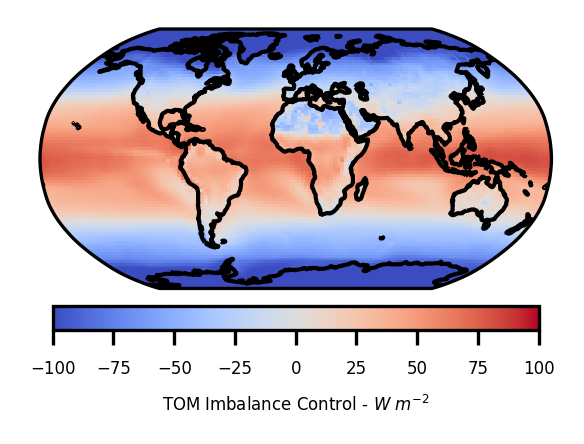

In [46]:
# You can look at these fields one at a time, differences from piControl or raw
plotprojection(imbalance_all.sel(casename='piControl'),vmax=100,title='TOM Imbalance Control - $W~m^{-2}$')

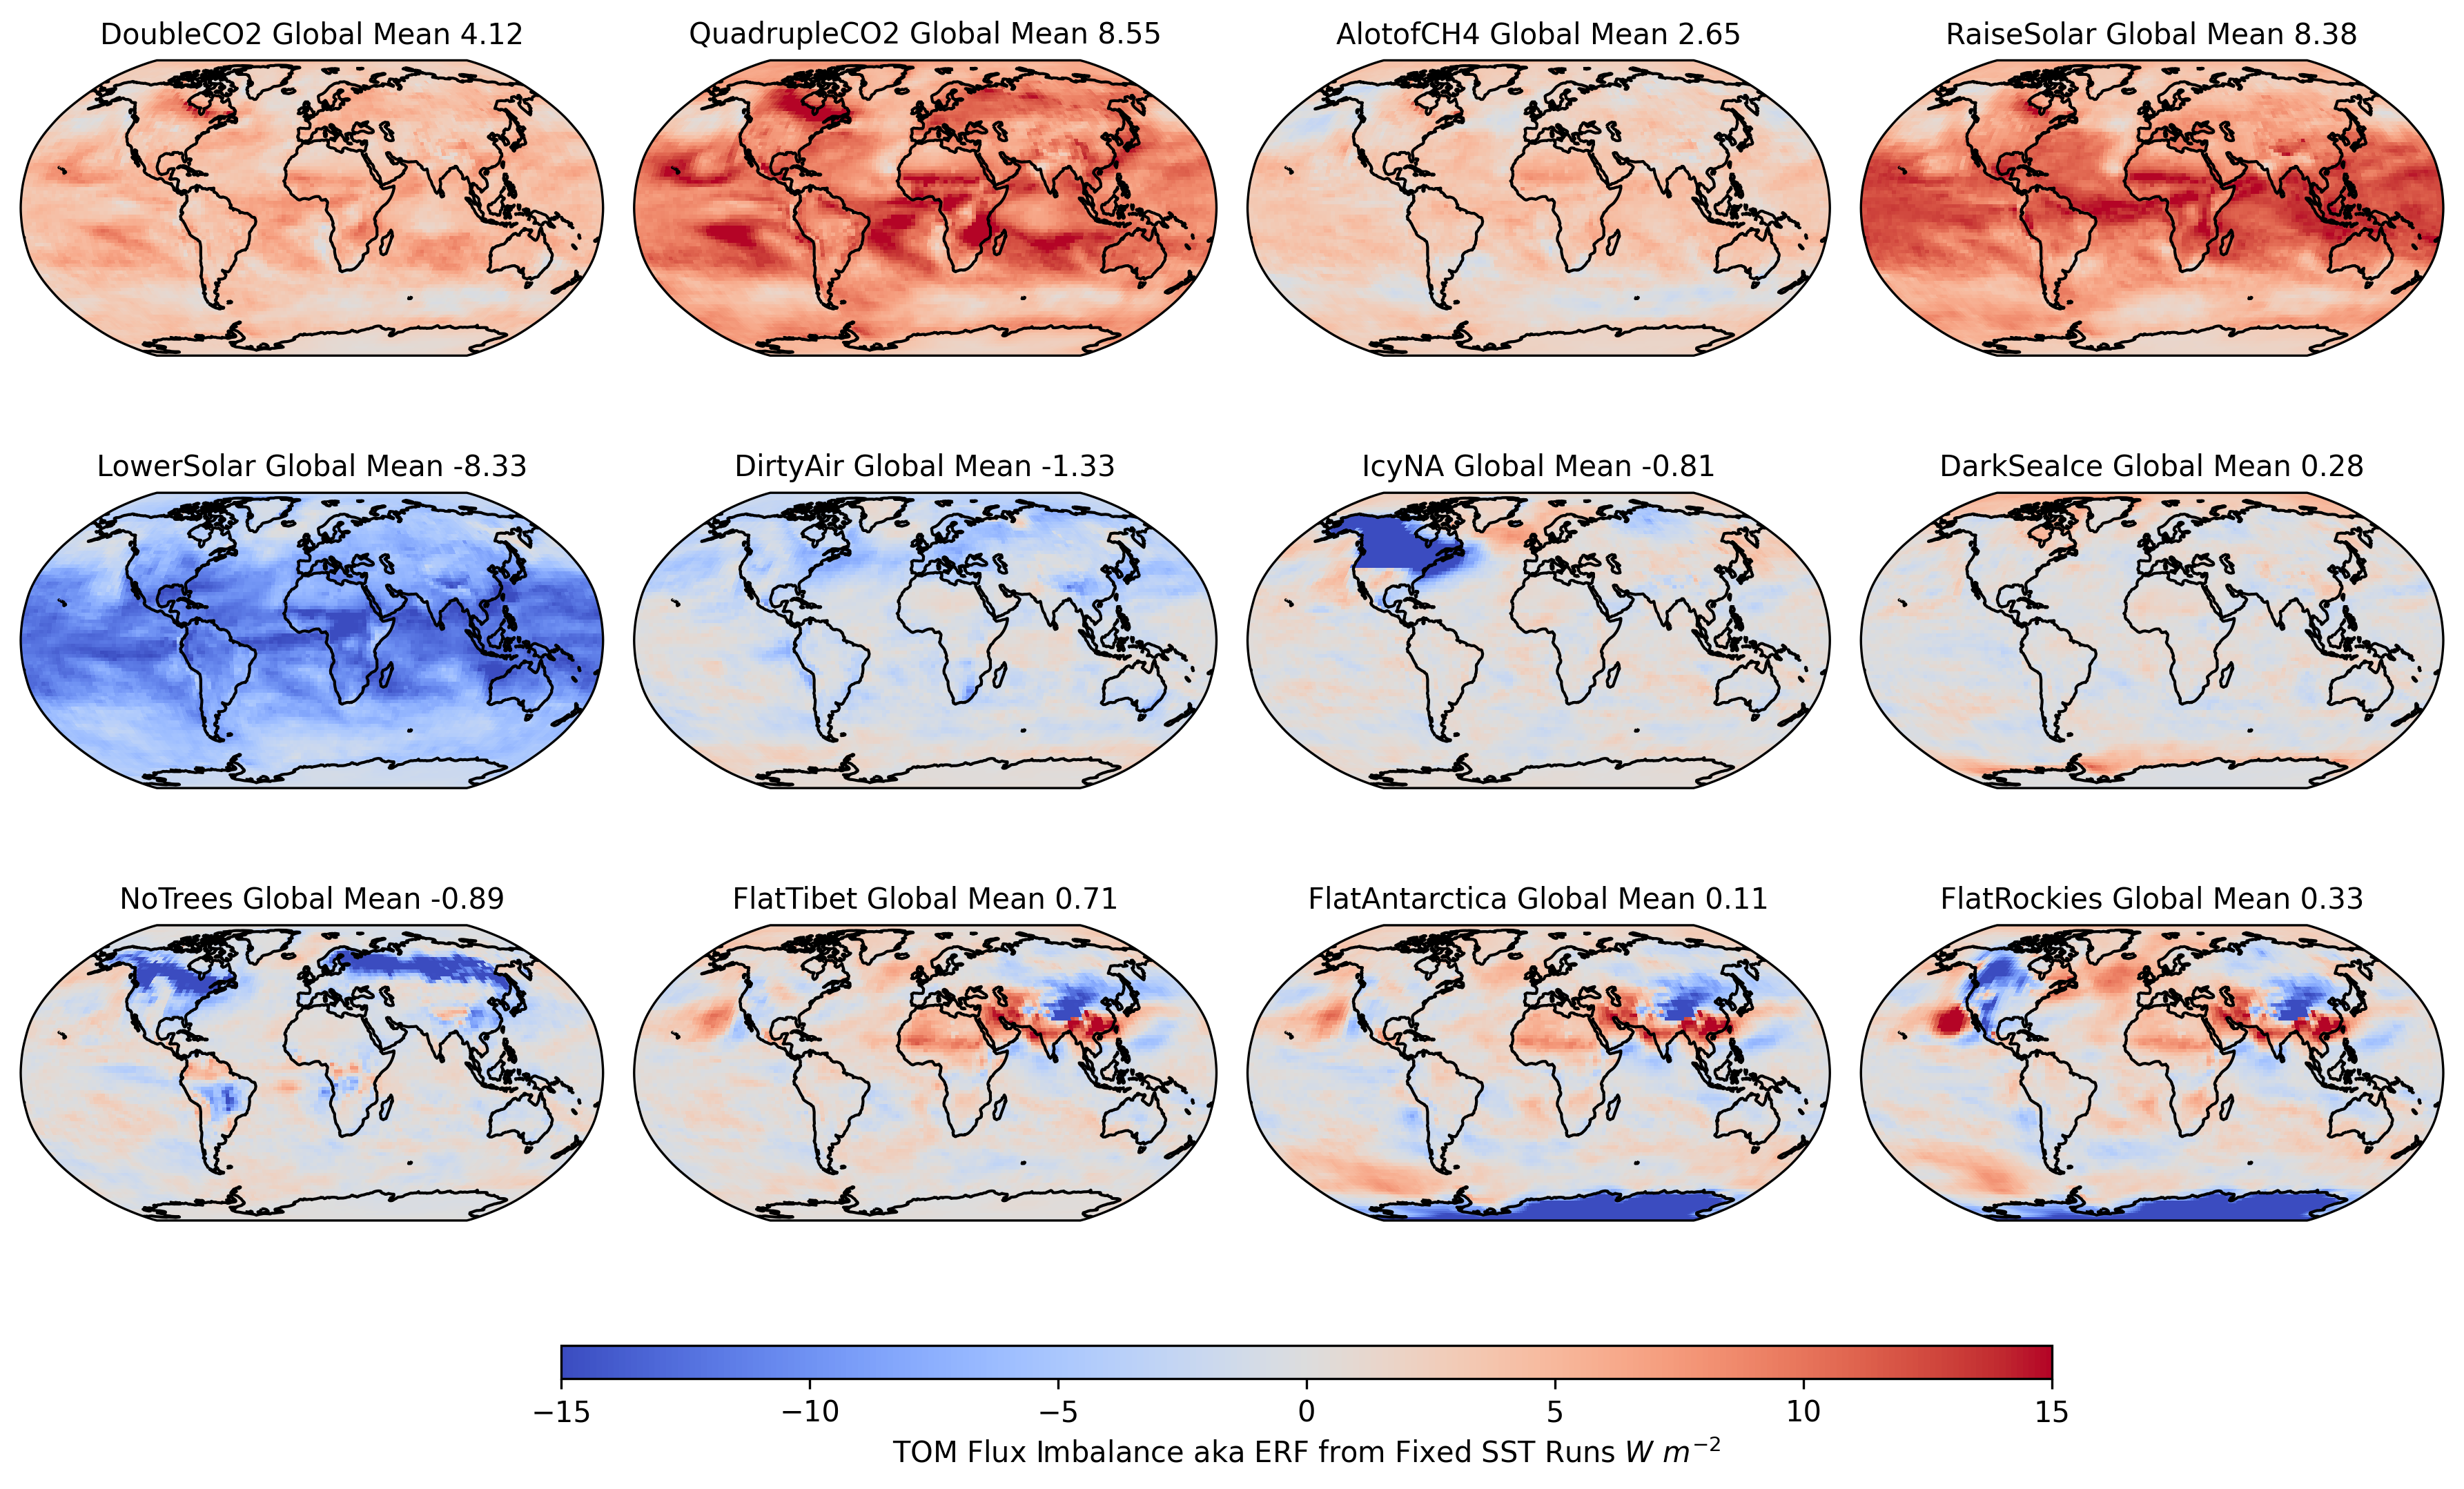

In [10]:
# this will be the ERF, it will take some time to plot
fig,globalmeans = plotAll_Anomalies(imbalance_all,vmax=15,title='TOM Flux Imbalance aka ERF from Fixed SST Runs $W~m^{-2}$')
np.save('TOMImbalance_FixedSST_GlobalMeans', globalmeans) # this saves the global means as a numpy file, easy to read back in later should you wish
fig.savefig('TOMFluxImbalance_FixedSSTRuns.png',
            bbox_inches="tight", dpi=300)


fig,Tglobalmeans = plotAll_Anomalies(trefht_all,vmax=5,title='$\Delta$ TREFHT from Fixed SST Runs deg C')
np.save('TREFHT_FixedSST_GlobalMeans', Tglobalmeans)
fig.savefig('TREFHT_FixedSSTRuns.png',
            bbox_inches="tight", dpi=300)


In [20]:
# FYI later you can read them back
glob=np.load('TREFHT_FixedSST_GlobalMeans.npy')
print(glob)

# Repeat some analysis for Fully Coupled Runs

In [27]:
# Fully Coupled 
ddir = '/glade/derecho/scratch/bitz/ADF/climo/FullyCoupled/'  # this is where the climatologies are

# these are the casenames used
casenames = ["b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001",
            "DoubleCO2",
            "b.e21.BCO2x4.f19_g17.CMIP6-abrupt4xCO2-2deg.001",
            "AlotofCH4",
            "RaiseSolar",
            "LowerSolar",
            "DirtyAir",
            "IcyNA",
            "DarkIce",
            "NoTrees",
            "FlatTibet",
            "FlatAntarctica",
            "FlatRockies"]

In [28]:
# Get a field from a single CAM variable like trefht
trefht_all=CombineFieldNicely(ddir,casenames,prefernames,'TREFHT')
print('\n\nYou just acquired all TREFHT from Fully Coupled runs combined together!\n\n')

b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001
DoubleCO2
b.e21.BCO2x4.f19_g17.CMIP6-abrupt4xCO2-2deg.001
AlotofCH4
RaiseSolar
LowerSolar
DirtyAir
IcyNA
DarkIce
NoTrees
FlatTibet
FlatAntarctica
FlatRockies


All TREFHT from FixedSST runs together


<xarray.DataArray 'trefht' (casename: 13, lat: 96, lon: 144)> Size: 719kB
array([[[225.19902, 225.07204, 225.04817, ..., 225.24135, 225.2382 ,
         225.22655],
        [225.2757 , 224.99117, 224.88127, ..., 225.64905, 225.53984,
         225.42871],
        [225.97856, 225.6686 , 225.52824, ..., 226.9358 , 226.74062,
         226.44383],
        ...,
        [256.56143, 256.63217, 256.69116, ..., 256.2952 , 256.38773,
         256.47498],
        [256.25388, 256.27402, 256.29355, ..., 256.166  , 256.19687,
         256.22723],
        [255.98335, 255.98036, 255.97731, ..., 255.98238, 255.98444,
         255.98482]],

       [[228.73543, 228.60834, 228.58446, ..., 228.77782, 228.77466,
         228.763  ],
        [228.84499, 228.5639 , 228.

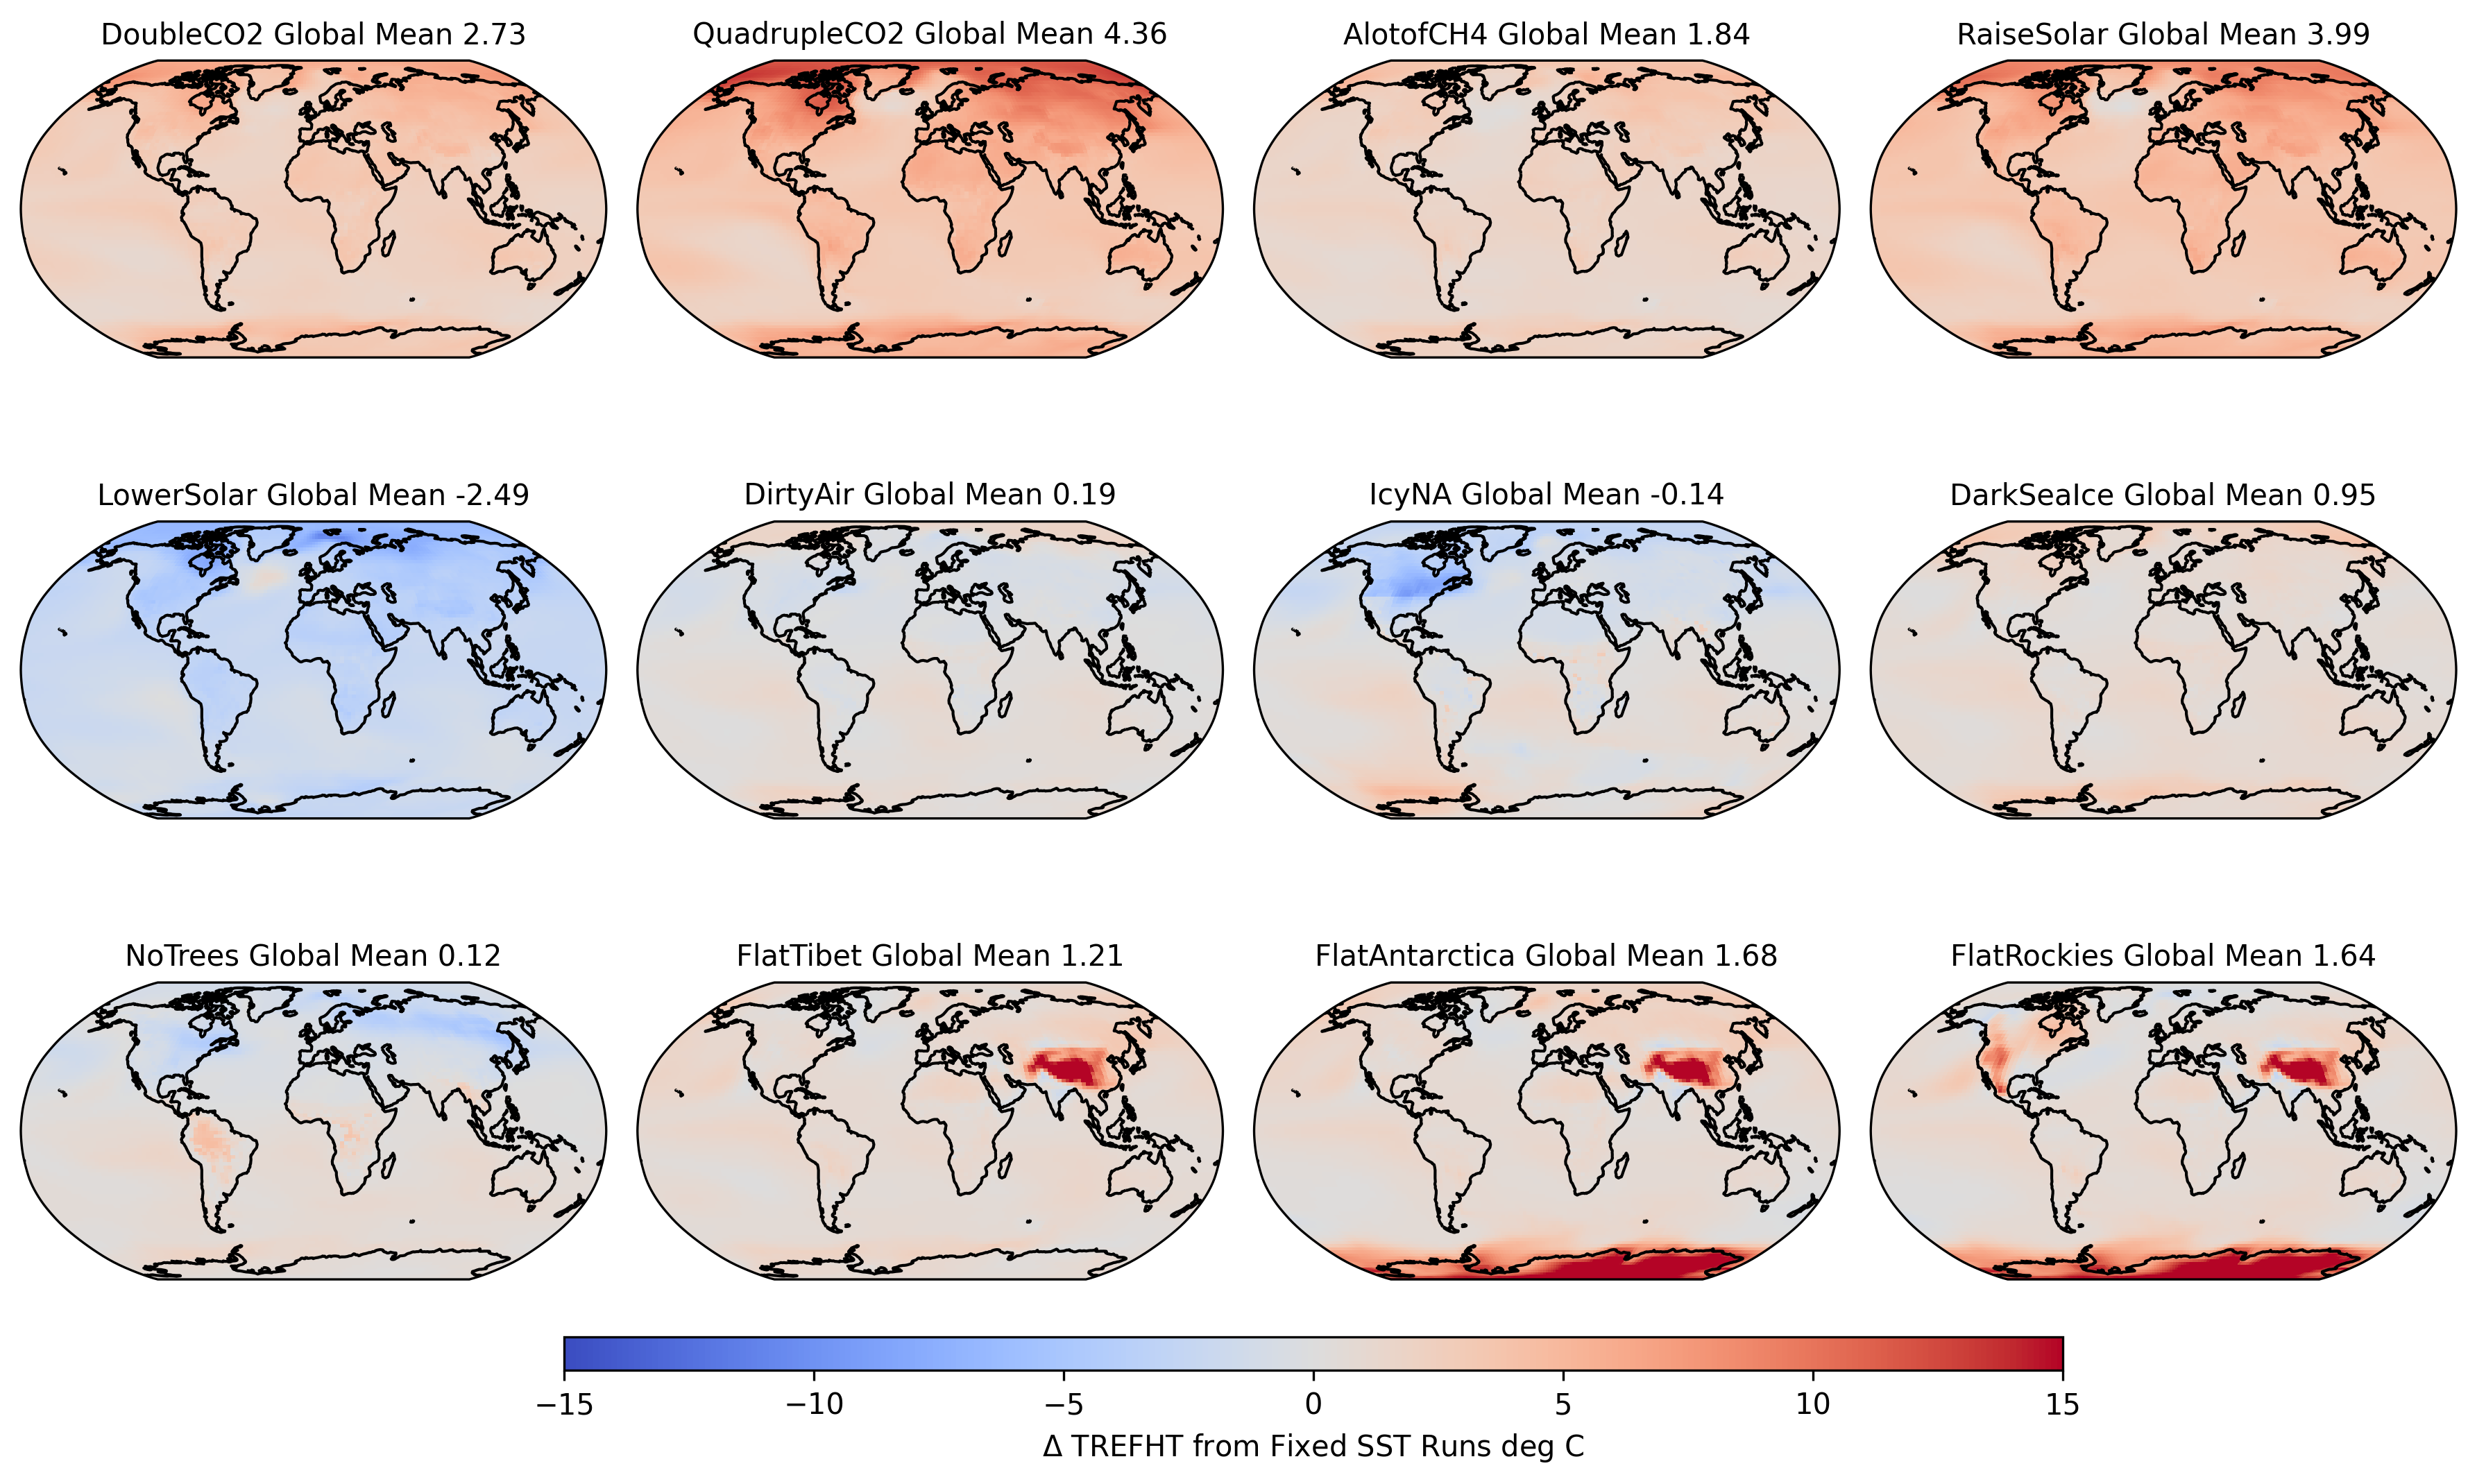

In [30]:
fig,Tglobalmeans = plotAll_Anomalies(trefht_all,vmax=15,title='$\Delta$ TREFHT from Fixed SST Runs deg C')
np.save('TREFHT_FullyCoupled_GlobalMeans', Tglobalmeans)
fig.savefig('TREFHT_FullyCoupledRuns.png',
            bbox_inches="tight", dpi=300)
